# PokéMetrics: Analyzing Stats and Type Effectiveness 
By Rachel Truong  
Published August 2, 2024  

## Introduction
The Pokemon games are centered around battling others with a team of "pocket monsters," hence the name of the franchise. With a predetermined set of stats and moves for each of their monster partners, players direct their Pokemon in battle and struggle against other Pokemon trainers to make their way to becoming the champion of the Pokemon world. These stats and decisions ultimately become the deciding factor in who emerges victorious. Thus, it is important for players to understand the stats and inner mechanics of the game. However, the game is a gem of childhood for many, and as children, many had simply played the game without paying much attention to stats and numbers. Of course, the game is designed well and can be played as such, but having played the game in that manner, I struggled. My Pokemon were okay, but were never strong enough for my liking. Of course, having played for so long, I eventually figured out through trial and error which Pokemon were stronger than others, but playing more and more, I find that I still struggle with picking better Pokemon to use. 

### Motivation 
But now, equipped with time and data, I wanted to take the opportunity to do a data-driven approach towards analyzing the differences in strength between Pokémon through comparing their base stats. I've never done an in-depth analysis before, as I simply have just played the game and choosing Pokemon that I liked and thought would do the job. Just last week I was casually playing, but my pokemon kept dying on me right next to the entrance of the next town.

### Data Description and Source
For this project, I will be using PokeAPI, an API linked to multiple databases detailing everything about the Pokémon main game series. I will be specifically be using data from these databases: 
| Dataset | Description                                                                                         | Link                                           |
|---------|-----------------------------------------------------------------------------------------------------|------------------------------------------------|
| Pokemon | Database of all pokemon that exist in the game, as well as their stats                              | [API Docs](https://pokeapi.co/docs/v2#pokemon) | 
| Types   | Database of the pokemon types, and anything that relates to them (type effectiveness, Pokemon, etc) | [API Docs](https://pokeapi.co/docs/v2#types)   |

### Research Questions 
- Which type combination are good to have?
- Which Pokemon have the best stats?  
- What is the best Pokemon to carry on you when running into random Pokemon and enemy trainers?

## Methods

### Library Imports
The following libraries that this project uses. If you are accessing this project through the binder, they should be already installed, otherwise you should run the following cell.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

### Data Download
Because I am using an API designed to just give you the complete data about specific things in pokemon, I have to call the API multiple times: first to get the list of items, and then X amount of times to get each specific record/row. Once I get each record, I store it in their respective dataframe: `poke_df` for pokemon and `type_df` for types. 

In [38]:
# Function to retrieve data from the API
def retrieve_data(url):
    # Getting the list of all Pokemon
    response = requests.get(url)
    url_list = response.json()['results']

    # Getting the data for each item
    details = []
    for url in url_list:
        response = requests.get(url['url'])
        details.append(response.json())

    # Converting data to DataFrame
    return pd.DataFrame(details)


# Getting the list of all Pokemon 
plist_url = "https://pokeapi.co/api/v2/pokemon?limit=1302&offset=0"
poke_df = retrieve_data(plist_url)

# Getting the list of all Pokemon types
tlist_url = "https://pokeapi.co/api/v2/type?limit=21&offset=0"
type_df = retrieve_data(tlist_url)

"""
# Saving the data to a csv file (for cache reasons)
poke_df.to_json('data/pokemon_data.json', orient='records', lines=True)
type_df.to_json('data/type_data.json', orient='records', lines=True)
"""


"\n# Saving the data to a csv file (for cache reasons)\npoke_df.to_json('data/pokemon_data.json', orient='records', lines=True)\ntype_df.to_json('data/type_data.json', orient='records', lines=True)\n"

At the end of the previous block, I previously downloaded the data frames I fetched (code is in comments). This is so in the future if the database is modified, someone else running this project can see what I got now. In order to run using that data, you can uncomment and run the following block.

In [39]:
"""
# Loading the data from the csv file
poke_df = pd.read_json('data/pokemon_data.json', orient='records', lines=True)
type_df = pd.read_json('data/type_data.json', orient='records', lines=True)
"""

"\n# Loading the data from the csv file\npoke_df = pd.read_json('data/pokemon_data.json', orient='records', lines=True)\ntype_df = pd.read_json('data/type_data.json', orient='records', lines=True)\n"

### Data Processing
Once you download the data, it's a good idea to check what the data you are working with looks like. I do so by using `.head()`.

In [40]:
poke_df.head()

,abilities,base_experience,cries,forms,game_indices,height,held_items,id,is_default,location_area_encounters,moves,name,order,past_abilities,past_types,species,sprites,stats,types,weight
0,"[{'ability': {'name': 'overgrow', 'url': 'http...",64.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'bulbasaur', 'url': 'https://pokeapi...","[{'game_index': 153, 'version': {'name': 'red'...",7,[],1,True,https://pokeapi.co/api/v2/pokemon/1/encounters,"[{'move': {'name': 'razor-wind', 'url': 'https...",bulbasaur,1,[],[],"{'name': 'bulbasaur', 'url': 'https://pokeapi....",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 45, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'grass', 'url': ...",69
1,"[{'ability': {'name': 'overgrow', 'url': 'http...",142.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'ivysaur', 'url': 'https://pokeapi.c...","[{'game_index': 9, 'version': {'name': 'red', ...",10,[],2,True,https://pokeapi.co/api/v2/pokemon/2/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",ivysaur,2,[],[],"{'name': 'ivysaur', 'url': 'https://pokeapi.co...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 60, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'grass', 'url': ...",130
2,"[{'ability': {'name': 'overgrow', 'url': 'http...",263.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'venusaur', 'url': 'https://pokeapi....","[{'game_index': 154, 'version': {'name': 'red'...",20,[],3,True,https://pokeapi.co/api/v2/pokemon/3/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",venusaur,3,[],[],"{'name': 'venusaur', 'url': 'https://pokeapi.c...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 80, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'grass', 'url': ...",1000
3,"[{'ability': {'name': 'blaze', 'url': 'https:/...",62.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'charmander', 'url': 'https://pokeap...","[{'game_index': 176, 'version': {'name': 'red'...",6,[],4,True,https://pokeapi.co/api/v2/pokemon/4/encounters,"[{'move': {'name': 'mega-punch', 'url': 'https...",charmander,5,[],[],"{'name': 'charmander', 'url': 'https://pokeapi...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 39, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'fire', 'url': '...",85
4,"[{'ability': {'name': 'blaze', 'url': 'https:/...",142.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'charmeleon', 'url': 'https://pokeap...","[{'game_index': 178, 'version': {'name': 'red'...",11,[],5,True,https://pokeapi.co/api/v2/pokemon/5/encounters,"[{'move': {'name': 'mega-punch', 'url': 'https...",charmeleon,6,[],[],"{'name': 'charmeleon', 'url': 'https://pokeapi...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 58, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'fire', 'url': '...",190


In [41]:
type_df.head()

,damage_relations,game_indices,generation,id,move_damage_class,moves,name,names,past_damage_relations,pokemon
0,"{'double_damage_from': [{'name': 'fighting', '...","[{'game_index': 0, 'generation': {'name': 'gen...","{'name': 'generation-i', 'url': 'https://pokea...",1,"{'name': 'physical', 'url': 'https://pokeapi.c...","[{'name': 'pound', 'url': 'https://pokeapi.co/...",normal,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",[],"[{'pokemon': {'name': 'pidgey', 'url': 'https:..."
1,"{'double_damage_from': [{'name': 'flying', 'ur...","[{'game_index': 1, 'generation': {'name': 'gen...","{'name': 'generation-i', 'url': 'https://pokea...",2,"{'name': 'physical', 'url': 'https://pokeapi.c...","[{'name': 'karate-chop', 'url': 'https://pokea...",fighting,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",[],"[{'pokemon': {'name': 'mankey', 'url': 'https:..."
2,"{'double_damage_from': [{'name': 'rock', 'url'...","[{'game_index': 2, 'generation': {'name': 'gen...","{'name': 'generation-i', 'url': 'https://pokea...",3,"{'name': 'physical', 'url': 'https://pokeapi.c...","[{'name': 'gust', 'url': 'https://pokeapi.co/a...",flying,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",[],"[{'pokemon': {'name': 'charizard', 'url': 'htt..."
3,"{'double_damage_from': [{'name': 'ground', 'ur...","[{'game_index': 3, 'generation': {'name': 'gen...","{'name': 'generation-i', 'url': 'https://pokea...",4,"{'name': 'physical', 'url': 'https://pokeapi.c...","[{'name': 'poison-sting', 'url': 'https://poke...",poison,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",[{'damage_relations': {'double_damage_from': [...,"[{'pokemon': {'name': 'bulbasaur', 'url': 'htt..."
4,"{'double_damage_from': [{'name': 'water', 'url...","[{'game_index': 4, 'generation': {'name': 'gen...","{'name': 'generation-i', 'url': 'https://pokea...",5,"{'name': 'physical', 'url': 'https://pokeapi.c...","[{'name': 'sand-attack', 'url': 'https://pokea...",ground,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",[],"[{'pokemon': {'name': 'sandshrew', 'url': 'htt..."


We can see that theres a lot of JSON data in there that isn't very useful for analysis right off the bat. Because I only want data in specific columns ('type' and 'stats' in `poke_df` and 'damage_relations' in `type_df`), I'll just process the data in those columns.

In [42]:
# Looking at what values in poke_df['types'] look like
poke_df['types'][0]

[{'slot': 1,
  'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}},
 {'slot': 2,
  'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]

For 'types' in `poke_df`, because we are just getting the values of all `type.name`, we just search for the values in the JSON and save it as a list. I chose not to do it as 2 columns as it would result in null values, which I think would make more work later for me when making data visualizations, so I just replaced the original value with the new list. 

In [43]:
# Extra every type name into list for each Pokemon and replace the 'types' column
types_array = []
for val in poke_df['types']:
    types = []
    for attr in val: 
        types.append(attr['type']['name'])
    types_array.append(types)

poke_df['types'] = types_array
poke_df['types'].head()

0    [grass, poison]
1    [grass, poison]
2    [grass, poison]
3             [fire]
4             [fire]
Name: types, dtype: object

In [44]:
# Looking at what values in poke_df['stats'] look like
poke_df['stats'][0]

[{'base_stat': 45,
  'effort': 0,
  'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}},
 {'base_stat': 49,
  'effort': 0,
  'stat': {'name': 'attack', 'url': 'https://pokeapi.co/api/v2/stat/2/'}},
 {'base_stat': 49,
  'effort': 0,
  'stat': {'name': 'defense', 'url': 'https://pokeapi.co/api/v2/stat/3/'}},
 {'base_stat': 65,
  'effort': 1,
  'stat': {'name': 'special-attack',
   'url': 'https://pokeapi.co/api/v2/stat/4/'}},
 {'base_stat': 65,
  'effort': 0,
  'stat': {'name': 'special-defense',
   'url': 'https://pokeapi.co/api/v2/stat/5/'}},
 {'base_stat': 45,
  'effort': 0,
  'stat': {'name': 'speed', 'url': 'https://pokeapi.co/api/v2/stat/6/'}}]

For 'stats' in `poke_df`, I wanted the name of the stat as well as its value (a int) so I just directly made a dictionary and set the key-value there as normal. Then I collected all the dictionaries into a list, turned the list into a data frame, and merged the new data frame with the original. 

In [45]:
# Extract the stat.name and base_stat into a list of dictionaries for each Pokemon
# Also while having all the stats for a row/Pokemon, calculate the total stats
stats_df = []
for val in poke_df['stats']:
    stats = {}
    for attr in val:
        stats[attr['stat']['name']] = attr['base_stat']
    stats["total"] = sum(stats.values())
    stats_df.append(stats)
 
# Convert stats into a Pandas dataframe and merge with the original df
stats_df = pd.DataFrame(stats_df)
poke_df = pd.concat([poke_df, stats_df], axis=1)
poke_df[['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense', 'total']].head()

,hp,attack,defense,speed,special-attack,special-defense,total
0,45,49,49,45,65,65,318
1,60,62,63,60,80,80,405
2,80,82,83,80,100,100,525
3,39,52,43,65,60,50,309
4,58,64,58,80,80,65,405


In [46]:
# looking at what values in type_df['damage_relations'] look like
type_df['damage_relations'][0]

{'double_damage_from': [{'name': 'fighting',
   'url': 'https://pokeapi.co/api/v2/type/2/'}],
 'double_damage_to': [],
 'half_damage_from': [],
 'half_damage_to': [{'name': 'rock',
   'url': 'https://pokeapi.co/api/v2/type/6/'},
  {'name': 'steel', 'url': 'https://pokeapi.co/api/v2/type/9/'}],
 'no_damage_from': [{'name': 'ghost',
   'url': 'https://pokeapi.co/api/v2/type/8/'}],
 'no_damage_to': [{'name': 'ghost',
   'url': 'https://pokeapi.co/api/v2/type/8/'}]}

For the damage relations in `type_df`, I wanted to extract out the name of the type of damage and keep it as the column name, and the values in the column to be a list of the corresponding relation, so I first made a dictionary, converted the values into a list, made the key-value pairs. Then I put all the dictionaries into a list, turned it into a data frame and merged it with the original one. 

In [47]:
# get type names for set difference for normal damage
type_names = type_df['name'].values

# extract each damage relation + data into list of dicts for each type
dmg_df = [] 
for val in type_df['damage_relations']:
    t_looked = []                           # for keeping check which we have looked at 
    
    # looks at attributes for damage multiplier
    damage = {}
    for attr in val:     
        # extract the type names in damage multiplier data                   
        type_list = []
        for type_ in val[attr]:  
            type_list.append(type_['name'])
            if attr[-2:] == 'to':
                t_looked.append(type_['name'])
                # keep track of which types we have looked at in to 
                # no look at from because we dont need to double count

        damage[attr] = type_list
    
    # added attr of normal damage and the values that should be in there
    damage['normal_damage_to'] = list(set(type_names) - set(t_looked))

    dmg_df.append(damage)

# Convert damage into a Pandas dataframe and merge with the original df
dmg_df = pd.DataFrame(dmg_df)
type_df = pd.concat([type_df, dmg_df], axis=1)
type_df[['double_damage_from', 'double_damage_to', 'half_damage_from', 'half_damage_to', 'no_damage_from', 'no_damage_to', 'normal_damage_to']].head()
        

,double_damage_from,double_damage_to,half_damage_from,half_damage_to,no_damage_from,no_damage_to,normal_damage_to
0,[fighting],[],[],"[rock, steel]",[ghost],[ghost],"[poison, fairy, dragon, unknown, water, electr..."
1,"[flying, psychic, fairy]","[normal, rock, steel, ice, dark]","[rock, bug, dark]","[flying, poison, bug, psychic, fairy]",[],[ghost],"[electric, shadow, fighting, fire, dragon, gro..."
2,"[rock, electric, ice]","[fighting, bug, grass]","[fighting, bug, grass]","[rock, steel, electric]",[ground],[],"[shadow, poison, fairy, normal, dark, psychic,..."
3,"[ground, psychic]","[grass, fairy]","[fighting, poison, bug, grass, fairy]","[poison, ground, rock, ghost]",[],[steel],"[electric, shadow, normal, dark, bug, psychic,..."
4,"[water, grass, ice]","[poison, rock, steel, fire, electric]","[poison, rock]","[bug, grass]",[electric],[flying],"[shadow, fairy, normal, dark, psychic, ice, dr..."


### Data Cleaning
Now that we have process all the necessary data, we can drop all the other columns that are unnecessary. 

In [48]:
poke_df = poke_df[['name', 'types', 'hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense', 'total']]
poke_df.head()

,name,types,hp,attack,defense,speed,special-attack,special-defense,total
0,bulbasaur,"[grass, poison]",45,49,49,45,65,65,318
1,ivysaur,"[grass, poison]",60,62,63,60,80,80,405
2,venusaur,"[grass, poison]",80,82,83,80,100,100,525
3,charmander,[fire],39,52,43,65,60,50,309
4,charmeleon,[fire],58,64,58,80,80,65,405


In [49]:
type_df = type_df[['name', 'double_damage_to', 'normal_damage_to', 'half_damage_to', 'no_damage_to']]
type_df.head() 

,name,double_damage_to,normal_damage_to,half_damage_to,no_damage_to
0,normal,[],"[poison, fairy, dragon, unknown, water, electr...","[rock, steel]",[ghost]
1,fighting,"[normal, rock, steel, ice, dark]","[electric, shadow, fighting, fire, dragon, gro...","[flying, poison, bug, psychic, fairy]",[ghost]
2,flying,"[fighting, bug, grass]","[shadow, poison, fairy, normal, dark, psychic,...","[rock, steel, electric]",[]
3,poison,"[grass, fairy]","[electric, shadow, normal, dark, bug, psychic,...","[poison, ground, rock, ghost]",[steel]
4,ground,"[poison, rock, steel, fire, electric]","[shadow, fairy, normal, dark, psychic, ice, dr...","[bug, grass]",[flying]


As a precaution, we should check and remove any rows that are missing data (NA, NaN, null). 

In [50]:
poke_df.isnull().sum()
# no need to call dropna() as there are no nulls

name               0
types              0
hp                 0
attack             0
defense            0
speed              0
special-attack     0
special-defense    0
total              0
dtype: int64

In [51]:
type_df.isnull().sum()
# also no need to call dropna()

name                0
double_damage_to    0
normal_damage_to    0
half_damage_to      0
no_damage_to        0
dtype: int64

### Understanding the Data


#### General Stats
To get a quick overview of the the data, I ran both `.info()` and `.describe()` on the data frames.

In [52]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1302 non-null   object
 1   types            1302 non-null   object
 2   hp               1302 non-null   int64 
 3   attack           1302 non-null   int64 
 4   defense          1302 non-null   int64 
 5   speed            1302 non-null   int64 
 6   special-attack   1302 non-null   int64 
 7   special-defense  1302 non-null   int64 
 8   total            1302 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 91.7+ KB


In [53]:
poke_df.describe()

,hp,attack,defense,speed,special-attack,special-defense,total
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,71.264977,81.580645,75.241935,71.156682,73.649002,72.966974,445.860215
std,26.764202,31.673015,30.492559,30.310259,32.469611,27.358069,119.865940
min,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000,175.000000
25%,54.000000,58.000000,53.000000,48.000000,50.000000,52.000000,335.000000
50%,70.000000,80.000000,70.000000,70.000000,65.000000,70.000000,470.000000
75%,85.000000,100.000000,95.000000,92.000000,95.000000,90.000000,525.000000
max,255.000000,190.000000,250.000000,200.000000,194.000000,250.000000,1125.000000


Looking at the Pokemon Data, there seems to be outliers towards the maximum, as they seem to have a standard distribution way higher than the rest. This is expected, as I believe that the points at the further end are probably some legendary Pokemon, which tends to be stronger because they tend to represent the "gods" of the Pokemon world. 

#### Distribution By Pokemon Stats

In order to get a more in depth view of Pokemon stats, I decided to draw up all the distribution of each of the individual stats.

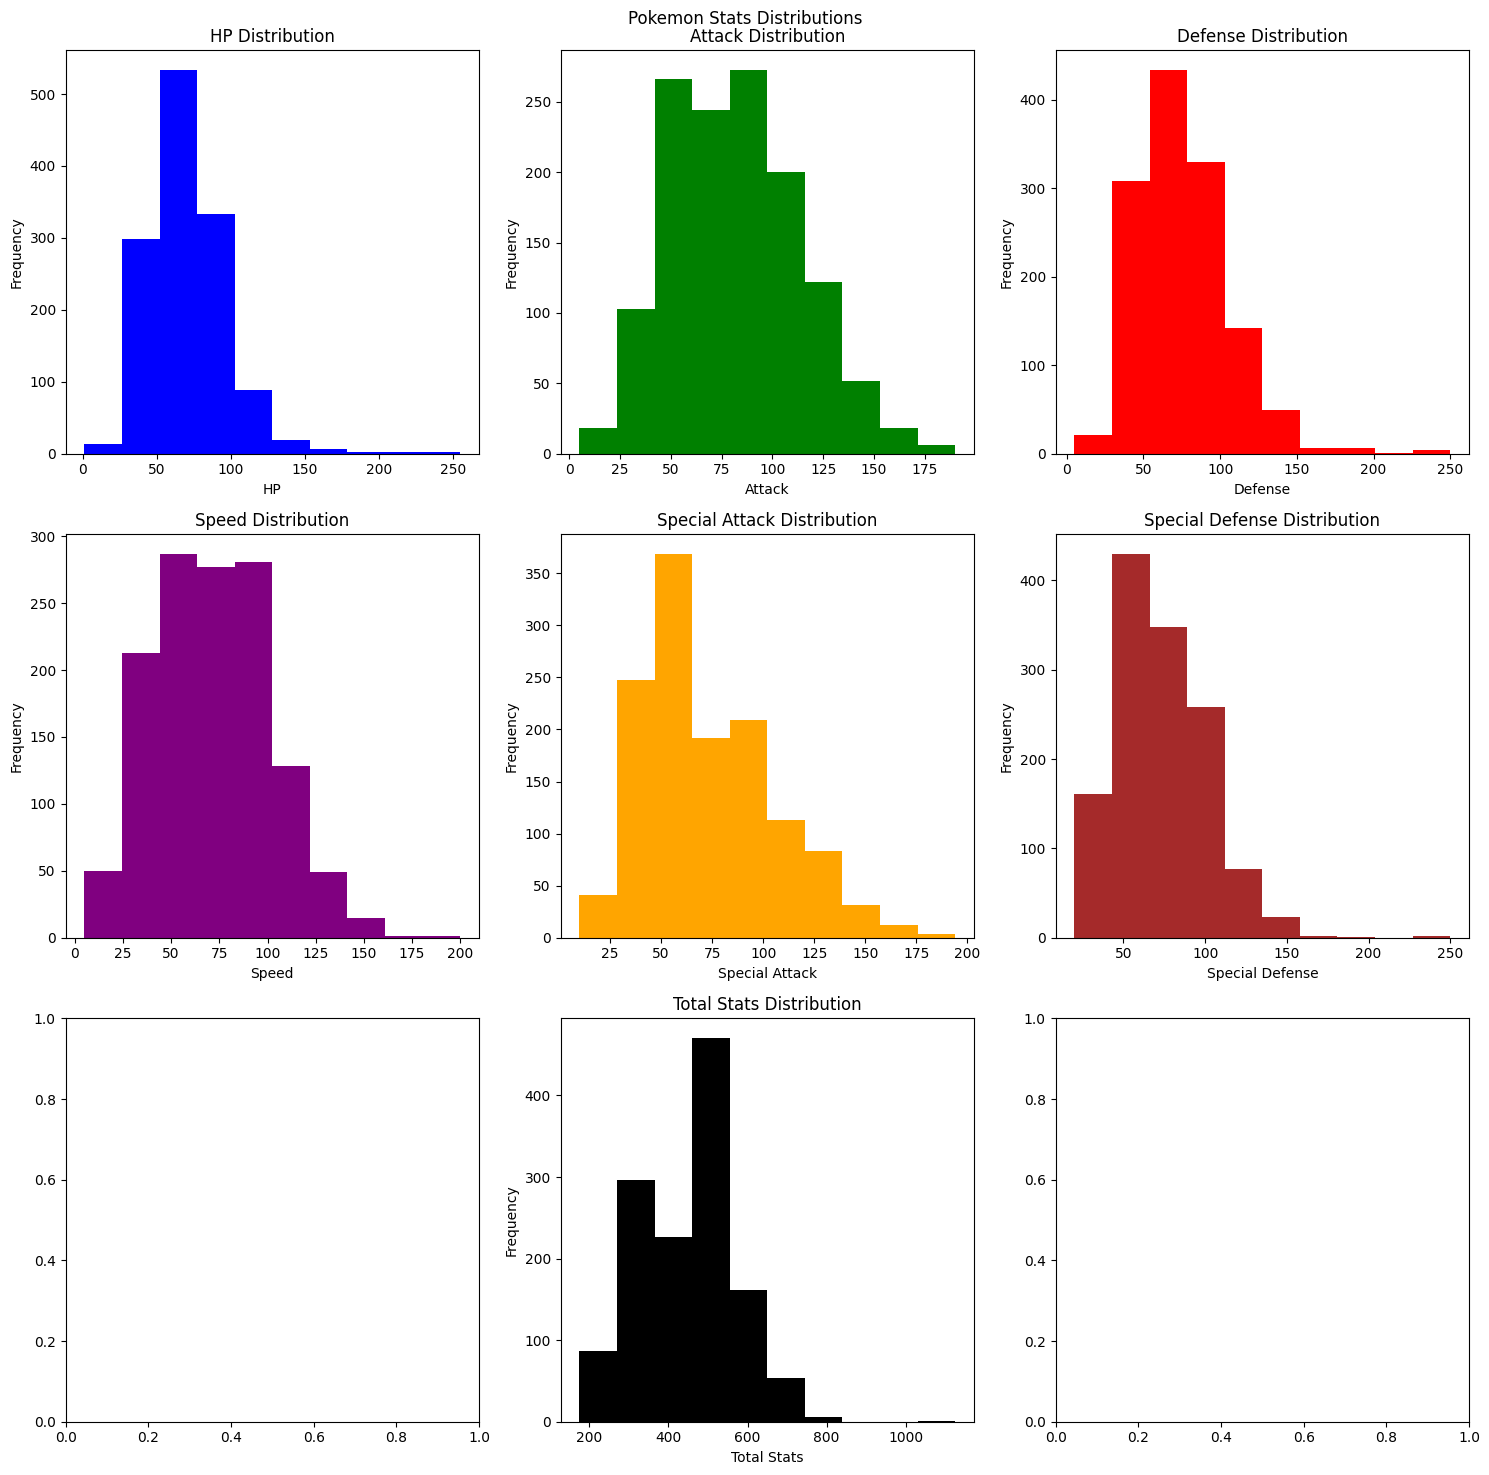

In [82]:
# Create 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15)) 
fig.suptitle('Pokemon Stats Distributions')

# Plot 1: Histogram of HP
axs[0, 0].hist(poke_df['hp'], color='blue')
axs[0, 0].set_title('HP Distribution')
axs[0, 0].set_xlabel('HP')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Histogram of Attack
axs[0, 1].hist(poke_df['attack'], color='green')
axs[0, 1].set_title('Attack Distribution')
axs[0, 1].set_xlabel('Attack')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Histogram of Defense
axs[0, 2].hist(poke_df['defense'], color='red')
axs[0, 2].set_title('Defense Distribution')
axs[0, 2].set_xlabel('Defense')
axs[0, 2].set_ylabel('Frequency')

# Plot 4: Histogram of Speed
axs[1, 0].hist(poke_df['speed'], color='purple')
axs[1, 0].set_title('Speed Distribution')
axs[1, 0].set_xlabel('Speed')
axs[1, 0].set_ylabel('Frequency')

# Plot 5: Histogram of Special Attack
axs[1, 1].hist(poke_df['special-attack'], color='orange')
axs[1, 1].set_title('Special Attack Distribution')
axs[1, 1].set_xlabel('Special Attack')
axs[1, 1].set_ylabel('Frequency')

# Plot 6: Histogram of Special Defense
axs[1, 2].hist(poke_df['special-defense'], color='brown')
axs[1, 2].set_title('Special Defense Distribution')
axs[1, 2].set_xlabel('Special Defense')
axs[1, 2].set_ylabel('Frequency')

# Plot 7: Histogram of Total Stats
axs[2, 1].hist(poke_df['total'], color='black')
axs[2, 1].set_title('Total Stats Distribution')
axs[2, 1].set_xlabel('Total Stats')
axs[2, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap and show plots
plt.tight_layout()
plt.show()

As you can see, a lot of of the stats seem to be skewed a little bit to the left. In addition, there are multiple plots with 2 peaks, suggesting that there are possible 2 subgroups of pokemon in here. 

#### Pokemon Type Chart

I decided to make heatmap of the effectiveness of each pokemon to see where possibly there might be a good indicator of which type matchup would be best. In order to make it, I made a `n x n` data frame based on how much damage an attacking type (row) would do against a defending type(column). As for the value in each cell, I set as the  scale that an attack would change based on the type effectiveness that the attacker would deal. 

In [55]:
# Initialize an empty DataFrame with attackers as rows and defenders as columns
atk_x_def = pd.DataFrame(0.0, index=type_names, columns=type_names)

# Fill in df based on relations in type_df
for row in type_df.iterrows():
    for col in type_names:        
        if col in row[1]['double_damage_to']:
            atk_x_def.loc[row[1]['name'], col] = 2.0
        elif col in row[1]['half_damage_to']:
            atk_x_def.loc[row[1]['name'], col] = 0.5
        elif col in row[1]['no_damage_to']:
            atk_x_def.loc[row[1]['name'], col] = 0
        else:
            atk_x_def.loc[row[1]['name'], col] = 1.0       
        
# Display the resulting DataFrame
atk_x_def

,normal,fighting,flying,poison,ground,rock,bug,ghost,steel,fire,...,grass,electric,psychic,ice,dragon,dark,fairy,stellar,unknown,shadow
normal,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.5,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
fighting,2.0,1.0,0.5,0.5,1.0,2.0,0.5,0.0,2.0,1.0,...,1.0,1.0,0.5,2.0,1.0,2.0,0.5,1.0,1.0,1.0
flying,1.0,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
poison,1.0,1.0,1.0,0.5,0.5,0.5,1.0,0.5,0.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
ground,1.0,1.0,0.0,2.0,1.0,2.0,0.5,1.0,2.0,2.0,...,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
rock,1.0,0.5,2.0,1.0,0.5,1.0,2.0,1.0,0.5,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
bug,1.0,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5,0.5,...,2.0,1.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0
ghost,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0
steel,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,...,1.0,0.5,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
fire,1.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0,2.0,0.5,...,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0


Once my data frame was made, using the `seaborn` package, I plotted the heatmap using the coolwarm to show a clear color difference from when it doing more damage verse less, with white being no change.

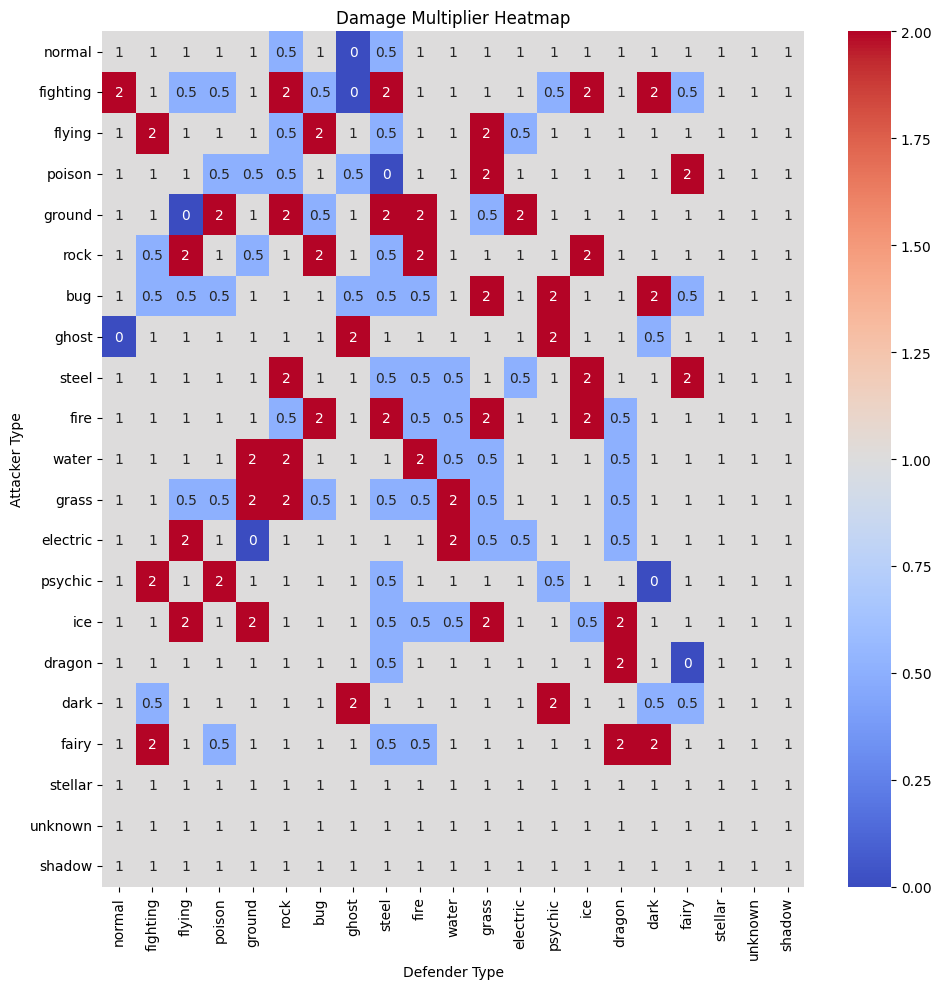

In [80]:
plt.figure(figsize=(10, 10))
sns.heatmap(atk_x_def, annot=True, cmap='coolwarm')
plt.title('Damage Multiplier Heatmap')
plt.ylabel('Attacker Type')
plt.xlabel('Defender Type')
plt.tight_layout()
plt.show()

Using this graph, it makes it easier to identify the weakness nad strengths of a pokemon, however you can't really identify any clear patterns as to which is clearly the superior type. (This is relevant)

## Analysis & Results


### Based on Typing

In order to make analyzing typings easier, I'm going to say that the overall effectiveness score is a sum of all the individual scores for each type. The more effective a type will be, the higher the score. I can think of 2 ways to compute the score. 

The first way is to measure how effective a Pokemon's moves would be against any other type. To calculate each individual score, I determined that choosing the more effective type of the Pokemon were against any other type. I decided to find the max because in the games, a Pokemon move can only be one type. 

In [57]:
# Score for effectiveness of their attacks
# Higher score, the better the attack
atker = []
for pokemon in poke_df.iterrows():
    scores = []
    for type_ in pokemon[1]['types']:                       # calculate a score for each type
        scores.append(atk_x_def.loc[type_].sum())
    atker.append((pokemon[1]['name'], max(scores)))         # max because attacks are one type


The other way is to measure how much damage the Pokemon can resist when they are attacked by a specific type of move. I calculated this using the product of the scores that the attacking type would deal based on the defending Pokemon's typing, just like in game.

In [58]:
# Score based on the effectiveness of their defenses
# Lower score, the better the defense
defer = []
for pokemon in poke_df.iterrows():
    scores = []
    for type_ in type_names:                                # calculate a score for each type
        score = 1.0
        for p_type in pokemon[1]['types']:                  # calculate type score against each type
            score *= atk_x_def.loc[type_, p_type]           # multiply the scores because types can cancel each out
        scores.append(score)

    total_score = len(type_names)**2/sum(scores) # sum because defenses against multiple types, divides total type to reverse from lowest good to highest good
    defer.append((pokemon[1]['name'], total_score) )

To see which Pokemon had the highest score, I plotted the top 15 scores of each type on a horizontal bar chart, with the topmost being considered the best.  

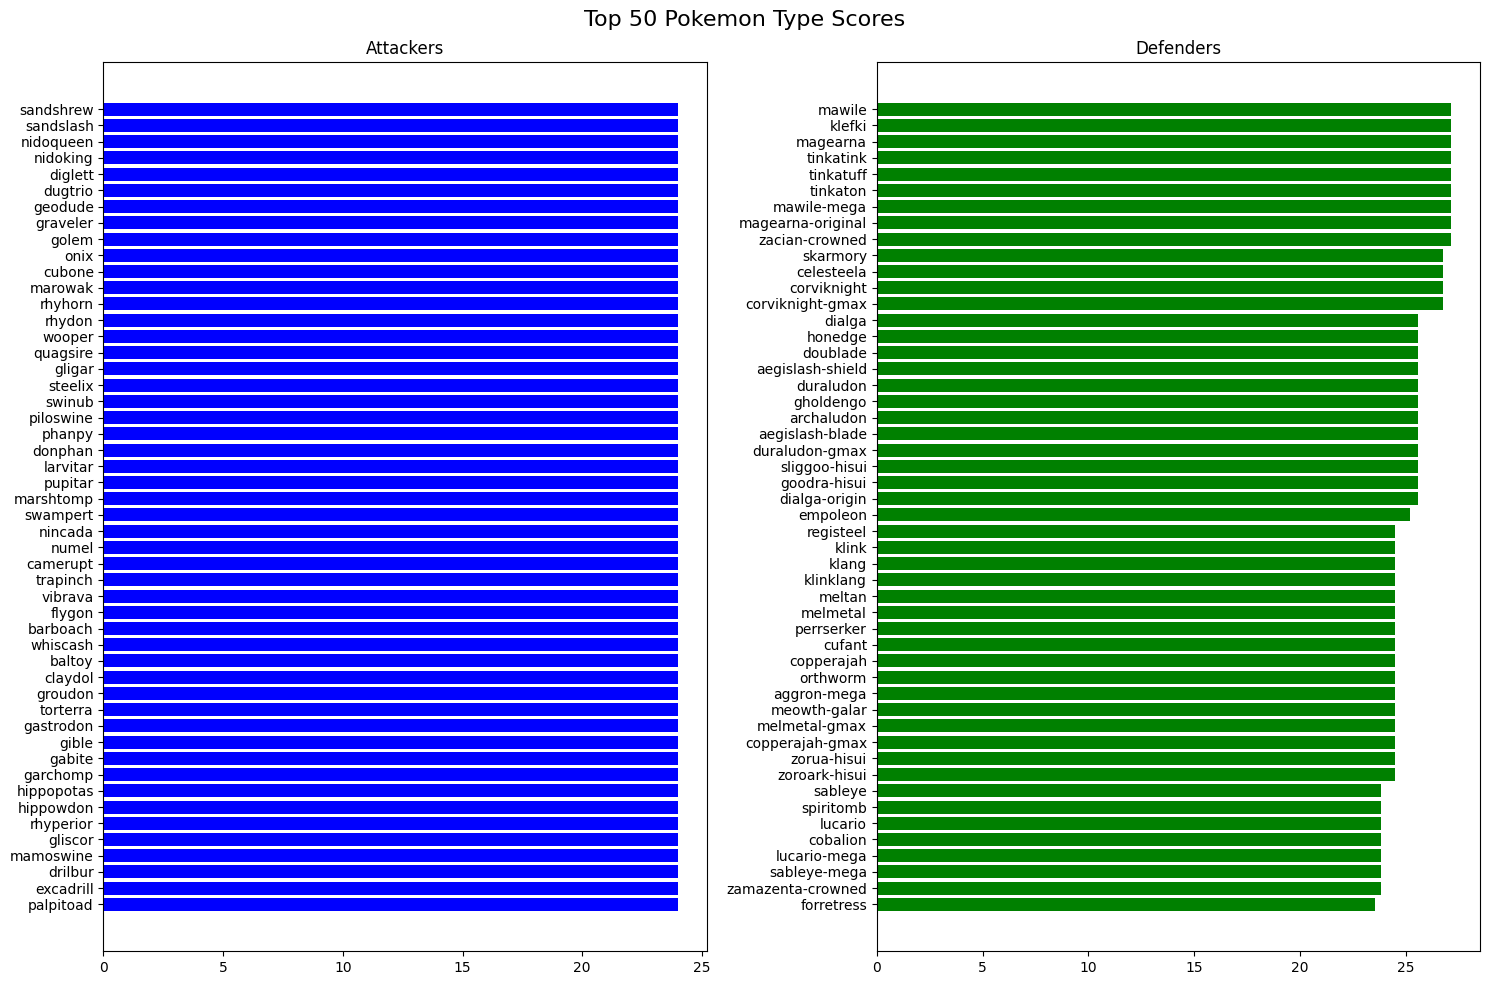

In [89]:
# Sort the data and divide them for plotting
atker_sort = sorted(atker, key=lambda x: x[1], reverse=True)
atker_names, atk_scores = zip(*atker_sort[:50][::-1])

defer_sort = sorted(defer, key=lambda x: x[1], reverse=True)
defer_names, def_scores = zip(*defer_sort[:50][::-1])

# create the bar plots 
fig, axs = plt.subplots(1, 2, figsize=(15, 10)) 
fig.suptitle('Top 50 Pokemon Type Scores', fontsize=16)

axs[0].barh(atker_names, atk_scores, color='blue')
axs[0].set_title('Attackers')

axs[1].barh(defer_names, def_scores, color='green')
axs[1].set_title('Defenders')

plt.tight_layout()
plt.show()

In [70]:
a = pd.Series([x[1] for x in atker])
print(a.unique())
a.describe()


[20.5 23.  22.5 19.  20.  24.  21.  22.  21.5 23.5]


count    1302.000000
mean       21.952381
std         1.320054
min        19.000000
25%        21.000000
50%        22.500000
75%        23.000000
max        24.000000
dtype: float64

In [71]:
d = pd.Series([x[1] for x in defer])
print(d.unique())
d.describe()

[19.82022472 21.         20.51162791 19.6        17.64       20.04545455
 21.51219512 20.75294118 22.05       21.25301205 15.75       19.17391304
 16.18348624 23.21052632 18.56842105 16.33333333 18.375      20.27586207
 16.96153846 18.18556701 22.61538462 18.96774194 21.77777778 17.46534653
 23.52       18.         16.64150943 26.72727273 23.83783784 27.13846154
 18.76595745 17.29411765 22.90909091 24.5        25.2        19.38461538
 25.56521739 15.20689655 17.81818182 16.8        16.03636364]


count    1302.000000
mean       20.211193
std         1.848205
min        15.206897
25%        19.173913
50%        20.275862
75%        21.000000
max        27.138462
dtype: float64

Simply observing, we can see that there is little no to no variation between the scores of the top 50 scoring attackers or defender, albeit defenders did have more variation. Looking at the attacker graph, the graph forms what almost is a straight line. The defenders, on the other hand, have a more diagonal line, but again, there's not enough of a difference between any of the defenders to be able to point to a singular Pokemon that can be crowned as the best defender. As there is very little variation in the top scorers in either attacker or defender, it is reasonable to draw the conclusion that there is no real difference between any of the top scorers. The ones shown on the graph will be the ones most effective from a general type effectiveness perspective, though not omniscient, and will be good choices on any team. But, to reiterate, since there is no large or noticeable difference, there is no single Pokemon that will trump the rest as an attacker or a defender.


### Based on Base Stats

When I think of analyzing a Pokémon based on its base stats, these are the approaches I think of:
- Total Attack Power: Summing up the Attack stat, Special Attack stat, or both provides an overall measure of offensive capability. Pokémon with high combined Attack stats would excel in dealing damage, so that the opponent has less turns to act before they are killed.
- Total Defense: Summing up the Defense stat and Special Defense stat gives you an idea of how well a Pokémon can withstand attacks. Pokémon with high combined Defense stats are sturdy and can endure hits effectively, lasting longer in battle.
- Attack + Defense Balance: Calculating the sum between Attack and Defense (Attack + Defense) provides insight into offensive versus defensive tendencies. Some Pokémon have high Attack but low Defense, while others have the opposite. Having a balance of these two stats can show you how well rounded a Pokemon is, showing 


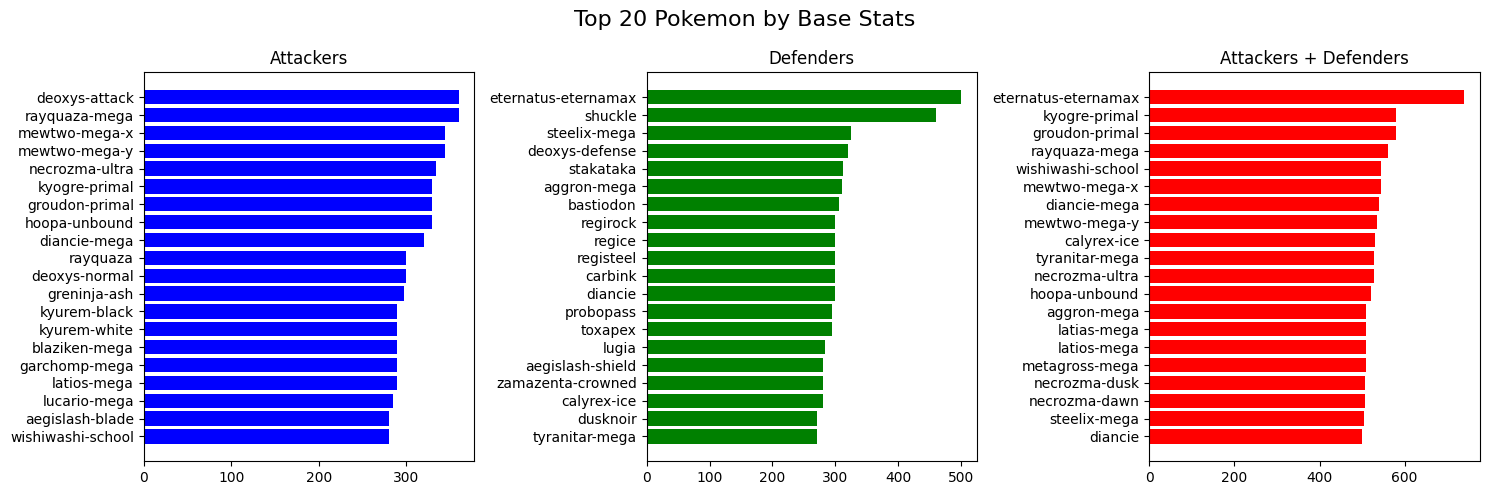

In [86]:
# Calculate the combined attack, defense, combined attack & defense, and total stats for each Pokemon
cmb_atk_raw = poke_df['attack'] + poke_df['special-attack']
cmb_atk = zip(poke_df['name'], cmb_atk_raw)
atk_stat = sorted(cmb_atk, key=lambda x: x[1], reverse=True)
atk_names, atk_vals = zip(*atk_stat[:20][::-1])

cmb_def_raw = poke_df['defense'] + poke_df['special-defense']
cmb_def = zip(poke_df['name'], cmb_def_raw)
def_stat = sorted(cmb_def, key=lambda x: x[1], reverse=True)
def_names, def_vals = zip(*def_stat[:20][::-1])

cmb_atkdef = cmb_atk_raw + cmb_def_raw
cmb_atkdef = zip(poke_df['name'], cmb_atkdef)
cmb_stat = sorted(cmb_atkdef, key=lambda x: x[1], reverse=True)
cmb_names, cmb_vals = zip(*cmb_stat[:20][::-1])


# create the bar plots 
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Top 20 Pokemon by Base Stats', fontsize=16)

axs[0].barh(atk_names, atk_vals, color='blue')
axs[0].set_title('Attackers')

axs[1].barh(def_names, def_vals, color='green')
axs[1].set_title('Defenders')

axs[2].barh(cmb_names, cmb_vals, color='red')
axs[2].set_title('Attackers + Defenders')


plt.tight_layout()
plt.show()


On these graphs, the scores of each Pokemon entry is calculated on purely numerical instance. As explained prior to the graph, the scores are derived simply by adding the base stats of the particular stat, either attack and special attack or defense and special defense. On the attacker side, we can see that Deoxys-Attack trumps as the Pokemon with the highest combined attack and special attack base stats. But looking further down the graph, we can see Rayquaza-Mega in close second, virtually with the same score. The rest of the top 20 attackers are close on their heels as well, ranging from roughly 295 to 320. On the defender side, with a little more disparity, we see Eternatus-Eternamax leading the pack with a sizeable lead with a combined defense and special defense score of over 500. The Pokemon Shuckle comes in second with more of a difference between the first and second defenders than the top two attackers. The scores of the remaining top 20 defenders drops off steeply into a plateau of scores averaging at about 300. The graph to the far right depicts the Pokemon with the highest combined score of attack, special attack, defense, and special defense. In other words, it could be viewed as a depiction of the previous two graphs combined. Eternatus-Eternamax remains at the top, which make sense given it's dominance over the defender category. The remainder of the top 20 trickles off slowly.

### Combination of Both Type and Stats

The two previous graphs separated two key components of the way Pokemon fight. Both base stats and types determine damage multipliers of the different moves that Pokemon use in battle in order to eliminate the other trainer, but just as each is important, it would not do to not consider the other. Both are the same side of the coin, as both are damage multipliers. Thus, we need to construct a graph that would consider both components, or in other words, we need to combine the two previous graphs. Additionally, since we will be investigating a new relationship via this new graph, it is important to keep in mind that data may or may not be the same as in the previous graphs as new values will be calculated and added to the mix. Both type effectiveness and base stats are found to be multiplier of the damage that can be dealt, therefore it is viable to say that the product of the two multipliers is a fair value to be used to gauge the effectiveness of a Pokemon's attack or defense stats in consideration to both of these variables. The graphs below display the top 20 scorers using the reasoning as mentioned.

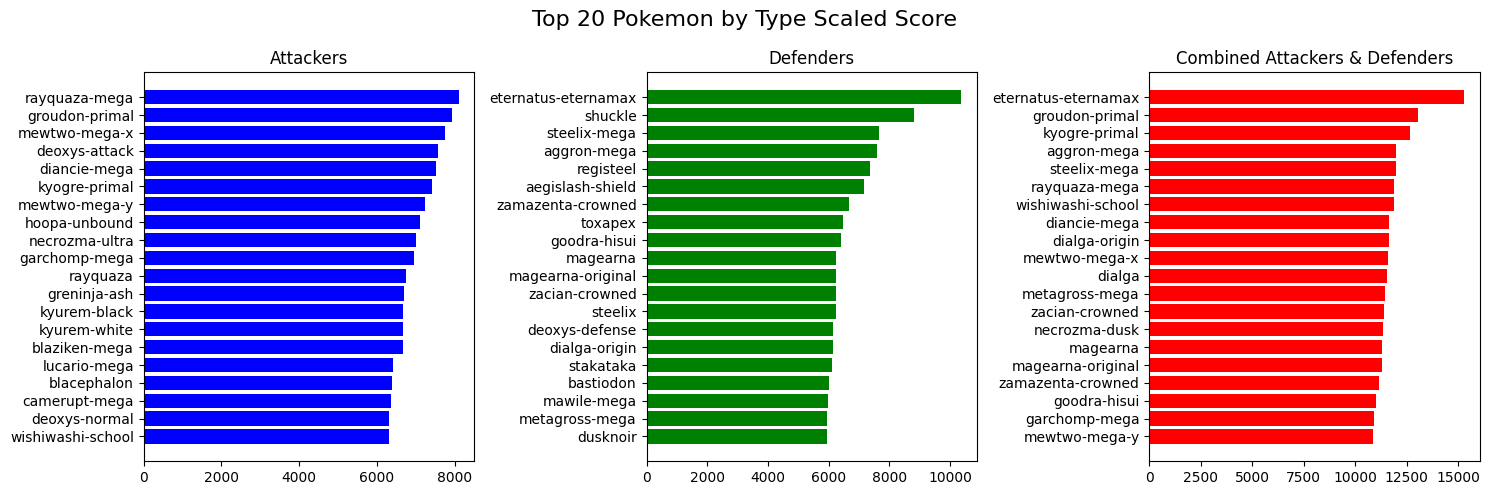

In [83]:
# Calculate the attack, defense, and combined attack & defense scores scaled with type
a_type_score = []
for pokemon, scale in atker:
    for pokemon2, score in zip(poke_df['name'], cmb_atk_raw):
        if pokemon == pokemon2:
            a_type_score.append((pokemon, scale * score))

d_type_score = []
for pokemon, scale in defer:
    for pokemon2, score in zip(poke_df['name'], cmb_def_raw):
        if pokemon == pokemon2:
            d_type_score.append((pokemon, scale * score))

c_type_score = []
for pokemon, score_a in a_type_score:
    for pokemon2, score_d in d_type_score:
        if pokemon == pokemon2:
            c_type_score.append((pokemon, score_a + score_d))

# sort the scores
a_type_score = sorted(a_type_score, key=lambda x: x[1], reverse=True)
d_type_score = sorted(d_type_score, key=lambda x: x[1], reverse=True)
c_type_score = sorted(c_type_score, key=lambda x: x[1], reverse=True)

# separate names and scores
a_type_names, a_type_scores = zip(*a_type_score[:20][::-1])
d_type_names, d_type_scores = zip(*d_type_score[:20][::-1])
c_type_names, c_type_scores = zip(*c_type_score[:20][::-1])

# create the bar plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Top 20 Pokemon by Type Scaled Score', fontsize=16)

# Plot 1: Bar plot of Attackers
axs[0].barh(a_type_names, a_type_scores, color='blue')
axs[0].set_title('Attackers')

# Plot 2: Bar plot of Defenders
axs[1].barh(d_type_names, d_type_scores, color='green')
axs[1].set_title('Defenders')

# Plot 3: Bar plot of Combined Attackers & Defenders
axs[2].barh(c_type_names, c_type_scores, color='red')
axs[2].set_title('Attackers + Defenders')

plt.tight_layout()
plt.show()



In comparison to the previous graphs, not much has changed in terms of shape. The top attacker graphs retains the regular shape, the top defender graph retains the 2 outliers, and the overall graph retains its singular outlier. That is not to say, however, that nothing has changed across the graphs. New Pokemon have changed the rankings of the top attacking and defending scoring Pokemon, however, there isn't a significant difference in the graph in comparison to the pure base stats graph.

## Discussion
Interestingly, if we look at the base stat graph above, not as many top defenders appear in the top 20 scorers in comparison to the top 20 attackers. It is also of note that the top defenders match the attackers in the top scores, save for the extreme outliers in the defense category. The top 20 defenders, not including the top 2 outliers, range from 290 to 330, while the top 20 attackers range from 340 to 295. It's a decently even range between the two. However, as mentioned earlier, the top 20 attackers appear more frequently on the top 20 overall attack+defense than the top 20 defenders. In fact, only 5 of 20 top defenders appear in the top 20 overall, whereas 10 of the top 20 attackers are included in the top 20 overall scorers. This loosely implies 2 things: One, that the top defenders are more commonly specialized in just defense since they don't appear in the top 20 overall scorers. Two, the contrapositive of the previous statement, that the top 20 attackers are more balanced than their top 20 defender counterparts. 10 out of 20 of the top 20 attackers appear in the top 20 overall, whereas only half of that, 5 out of 20 of the top 20 defenders appear in the top overall 20. This would imply that the top attackers more often have a sizeable defense stat to keep them in the overall top ranks whereas top defenders cannot say the same in reverse. However, as mentioned earlier, this is only loosely implied. This hypothesis was only drawn in analysis of the current displayed 20 units of data per category, and more specific data comparison, say between the ratio of attack and defense in the top attackers and defenders, would have to be conducted to be able to solidly say that top attackers are more balanced than top defenders.

In addition, I would like to point out my calculations for determining type score is a bit wonky, because in hindsight it would have been easier to determine the effectiveness of types by finding the average, because average a more proportional operation compared to just simply adding. For that reason, I believe that is why the results based just off of type score had such a small range and had little to none variation. For further analysis I would probably choose to do it with an average if I were to use the metric of score typing again.

I would also like to highlight the skewness and the distribution have multiple peaks. In the data there are definitely multiple groups, as not only were there normal Pokemon, there were also legendary Pokemon, which are intentionally made by the Pokemon company to be stronger due to story reason, but there are also a type of Pokemon I like to call gimmicks (because its basically the same thing under different names) which are also made strong *due to the power of friendship*. For that reason I would think that to make the analysis better in the future, it would be best to separate the groups from the normal set of Pokemon and conduct an analysis on those separately.

### Conclusion
To answer the initial questions that I started, according to the data, there is not outstanding type matchup for Pokemon. In terms of stats, Eternatus-Eternamax seems to be the strongest in both pure stats and with the type score modifier for both overall and defensive, but in terms of pure total attack power, Rayquaza-Mega comes out on top. The lack of an outstanding type matchup for Pokemon makes sense in this data analysis because it would cause gameplay to become unbalanced. Say, for example, your favorite MMORPG game had an overpowered weapon that was capable of destroying everything and anything. All the players would flock to using that weapon and discard all other available weapons in favor for it. The same applies here. The Pokemon franchise prides itself upon its variety of different Pokemon and type-matchup dependent battles. To allow for one type to have a clear advantage would be akin to destroying the mechanics of the game. However, you may find yourself wondering why some Pokemon are so much better than others at all. This is because the Pokemon with higher stats are often legendary or mythical Pokemon, or locked behind some form of story in the game. These Pokemon *are* the challenge to the player or one of the final bosses, and are thus made intentionally difficult to fight, thus still preserving the reasoning from before.

![Eternatus-Eternamax](https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/62db5cd7-f007-460c-a919-1704ac1d6fd4/dfe39bn-8dde0707-b621-4976-8ad3-eaa75ce8a6c7.png/v1/fill/w_1048,h_763/eternamax_eternatus_by_mrlarions_dfe39bn-pre.png?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMjY0MzczYTVmMGQ0MTVlYTBkMjZlMCIsIm9iaiI6W1t7InBhdGgiOiJcL2ZcLzYyZGI1Y2Q3LWYwMDctNDYwYy1hOTE5LTE3MDRhYzFkNmZkNFwvZGZlMzlibi04ZGRlMDcwNy1iNjIxLTQ5NzYtOGFkMy1lYWE3NWNlOGE2YzcucG5nIiwiaGVpZ2h0IjoiPD0xMzk4Iiwid2lkdGgiOiI8PTE5MjAifV1dLCJhdWQiOlsidXJuOnNlcnZpY2U6aW1hZ2Uud2F0ZXJtYXJrIl0sIndtayI6eyJwYXRoIjoiXC93bVwvNjJkYjVjZDctZjAwNy00NjBjLWE5MTktMTcwNGFjMWQ2ZmQ0XC9tcmxhcmlvbnMtNC5wbmciLCJvcGFjaXR5Ijo5NSwicHJvcG9ydGlvbnMiOjAuNDUsImdyYXZpdHkiOiJjZW50ZXIifX0.5lCejiHpkWnXlwPJMOPE7CWfGC3u2yvUkuhviWITNo4)  

### Limitations
There are, however, limitations to the comparisons made in this data. Even with set stats, there are many varying factors that all contribute in deciding the victor in a Pokemon battle. It's near impossible to conclude the winner of a battle just from conclusions driven from hard numerical data, as for example, Pokemon may learn moves of a different type than the Pokemon's base type, or the level of the Pokemon can boost its stats to that of a level where it can win against a different Pokemon it would normally be at a disadvantage against. Even as we're talking about predetermined stats, there are abilities or items that Pokemon have that can drastically alter it's abilities or stats unexpectedly. Professional pokemon players have pulled off huge upstart wins with strategies utilizing these miscellaneous abilities and gimmicks, so it's not to say this data is the end all be all.